In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Transactions = pd.read_excel('DATA/KPMG_VI_New_raw_data_update_final (3).xlsx',sheet_name='Transactions',)
CustomerAddress = pd.read_excel('DATA/KPMG_VI_New_raw_data_update_final (3).xlsx',sheet_name='CustomerAddress')
CustomerDemographic = pd.read_excel('DATA/KPMG_VI_New_raw_data_update_final (3).xlsx',sheet_name='CustomerDemographic')


In [126]:
NewCustomerList = pd.read_excel('DATA/KPMG_VI_New_raw_data_update_final (3).xlsx',sheet_name='NewCustomerList')

In [3]:
# Adjusting the column names Clearly

Transactions.columns=Transactions.iloc[0].to_list()
Transactions.drop(0,inplace=True)

CustomerDemographic.columns = CustomerDemographic.iloc[0].to_list()
CustomerDemographic.drop(0, inplace=True)


CustomerAddress.columns = CustomerAddress.iloc[0].to_list()
CustomerAddress.drop(0, inplace=True)





In [128]:
NewCustomerList.columns = NewCustomerList.iloc[0].to_list()
NewCustomerList.drop(0, inplace=True)

In [4]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [5]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [6]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [7]:
merged_semi = CustomerDemographic.merge(Transactions,on='customer_id',how='inner')
merged_final = merged_semi.merge(CustomerAddress,on='customer_id',how='inner')

# BASIC UNDER-STANDING

In [8]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          19968 non-null  object
 1   first_name                           19968 non-null  object
 2   last_name                            19326 non-null  object
 3   gender                               19968 non-null  object
 4   past_3_years_bike_related_purchases  19968 non-null  object
 5   DOB                                  19522 non-null  object
 6   job_title                            17589 non-null  object
 7   job_industry_category                16746 non-null  object
 8   wealth_segment                       19968 non-null  object
 9   deceased_indicator                   19968 non-null  object
 10  default                              18517 non-null  object
 11  owns_car                             1996

## Handling the datatype of some mismatched datatypes


In [9]:
columns_of_intger = ['list_price','standard_cost','product_first_sold_date','property_valuation']
for col in columns_of_intger:
    merged_final[col] = merged_final[col].astype('float')

## Datetime Column

In [10]:
date_columns = ['transaction_date','DOB']
for col in date_columns:
    merged_final[col] = pd.to_datetime(merged_final[col])
    

## checkout Null values

<Axes: >

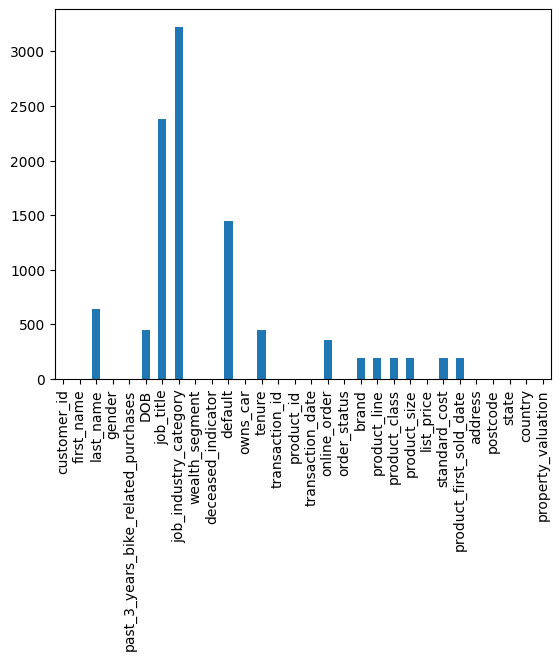

In [11]:
merged_final.isnull().sum().plot(kind='bar')

# Report :
### 1. These are the columns below have no missing values
[customer_id,first_name,gender,past_3_years_bike,wealth_segment,decased_indicator,transaction_id,product_id,transcation_date,product_id,order_status,list_price,address,postcode,state,country,property_valuation]

### 2. Most and least missing values 
1. Most_missing values: [job_title,job_industry_category]
2. Least_missing values: [brand,product_line,product_class,product_size,standard_cost,product_first_sold_date]

In [12]:
merged_final.select_dtypes(include='object').describe()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,default,...,online_order,order_status,brand,product_line,product_class,product_size,address,postcode,state,country
count,19968,19968,19326,19968,19968,17589,16746,19968,19968,18517,...,19609,19968,19773,19773,19773,19773,19968,19968,19968,19968
unique,3489,2835,3263,6,100,195,9,3,2,90,...,2,2,6,4,3,3,3487,835,5,1
top,1068,Corabelle,Gladman,Female,16,Social Worker,Manufacturing,Mass Customer,N,-1,...,True,Approved,Solex,Standard,medium,medium,4297 Emmet Lane,2153,NSW,Australia
freq,14,36,24,9979,291,226,4014,10029,19960,575,...,9818,19790,4248,14156,13802,12969,14,169,10200,19968


In [13]:
merged_final.select_dtypes(exclude='object').describe()

,DOB,transaction_date,list_price,standard_cost,product_first_sold_date,property_valuation
count,19522,19968,19968.000000,19773.000000,19773.000000,19968.000000
mean,1977-08-01 21:51:30.298125216,2017-07-01 14:10:31.730769152,1107.780004,556.091050,38198.741364,7.516376
min,1843-12-21 00:00:00,2017-01-01 00:00:00,12.010000,7.210000,33259.000000,1.000000
25%,1968-04-20 00:00:00,2017-04-01 00:00:00,575.270000,215.140000,35667.000000,6.000000
50%,1977-08-31 00:00:00,2017-07-03 00:00:00,1163.890000,507.580000,38216.000000,8.000000
75%,1987-03-27 00:00:00,2017-10-02 00:00:00,1635.300000,795.100000,40672.000000,10.000000
max,2002-03-11 00:00:00,2017-12-30 00:00:00,2091.470000,1759.850000,42710.000000,12.000000
std,NaN,NaN,582.852548,405.966472,2874.856871,2.824783


# Handling the Missing values

In [14]:
missing_values_df=merged_final[merged_final.columns[merged_final.isnull().sum()>0]]

### name plays no role in the data hence we will delet it

In [15]:
merged_final.drop(['first_name','last_name'],axis=1,inplace=True)

### Hadnling DOB by Converting the DOB into AGE , finally by using the mean imputation we can handle missing values

In [16]:
merged_final['DOB']=2023-missing_values_df['DOB'].dt.year

In [17]:
merged_final['DOB'].value_counts()

DOB
45.0     1114
46.0     1062
47.0      776
49.0      754
43.0      636
44.0      604
50.0      602
48.0      559
37.0      540
28.0      534
64.0      504
59.0      463
38.0      449
52.0      412
34.0      407
54.0      406
42.0      404
25.0      401
27.0      381
56.0      376
36.0      371
29.0      360
26.0      358
35.0      352
31.0      348
55.0      346
61.0      335
67.0      317
57.0      316
58.0      315
66.0      305
65.0      301
24.0      290
63.0      287
69.0      281
60.0      279
62.0      275
53.0      274
68.0      273
30.0      273
51.0      270
33.0      245
32.0      229
39.0      214
23.0      206
41.0      205
40.0      168
22.0      167
70.0      112
21.0       27
92.0       10
180.0       9
80.0        7
79.0        5
88.0        5
83.0        3
Name: count, dtype: int64

<Axes: ylabel='Density'>

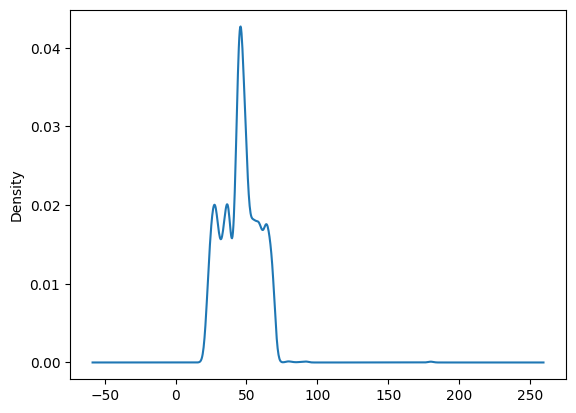

In [18]:
merged_final['DOB'].plot(kind='kde')

In [19]:
merged_final['DOB'].fillna(merged_final['DOB'].mean(),inplace=True)

<Axes: ylabel='Density'>

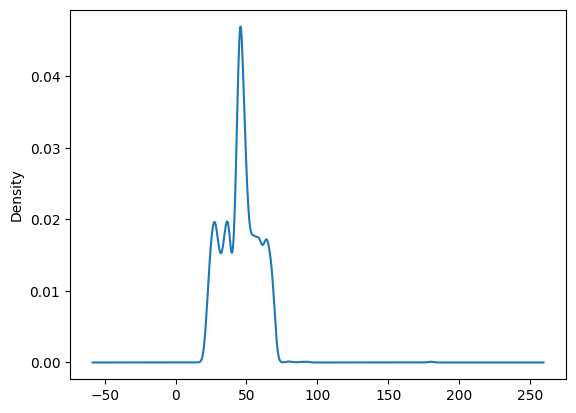

In [20]:
merged_final['DOB'].plot(kind='kde')

### Handling [job title & job_industry_category] by addinng a new category as "Missing"

In [21]:
missing_values_df['job_title'].value_counts()

job_title
Social Worker                           226
Legal Assistant                         221
Business Systems Development Analyst    221
Assistant Professor                     212
Executive Secretary                     208
                                       ... 
Administrative Assistant I               15
Health Coach III                         14
Geologist II                             11
Research Assistant III                    9
Developer I                               7
Name: count, Length: 195, dtype: int64

In [22]:
merged_final['job_title'].fillna("Missing",inplace=True)
merged_final['job_industry_category'].fillna("Missing",inplace=True)

### default have no importance in the data hence we drop it out


In [23]:

merged_final.drop('default',axis=1,inplace=True)

### Here tenure column handled first by  mean imputation and convert into range of 1-5 by freq

<Axes: ylabel='Frequency'>

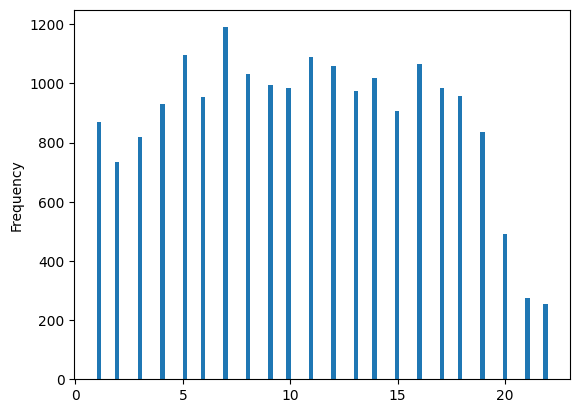

In [24]:
missing_values_df['tenure'].plot(kind="hist",bins=100)



In [25]:
missing_values_df['tenure'].fillna(0,inplace=True)
missing_values_df['tenure']=missing_values_df['tenure'].astype('int')
mean_of_tenure = int(missing_values_df['tenure'].mean())

merged_final['tenure'].fillna(mean_of_tenure,inplace=True)
merged_final['tenure']=merged_final['tenure'].astype('int')

C:\Users\91845\AppData\Local\Temp\ipykernel_4988\2193273251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values_df['tenure'].fillna(0,inplace=True)
C:\Users\91845\AppData\Local\Temp\ipykernel_4988\2193273251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values_df['tenure']=missing_values_df['tenure'].astype('int')


In [26]:
def tenure_group_making(x):
    if x >0 and x<=5 :
        return 1
    elif x>5 and x<=10:
        return 2
    elif x>10 and x<=15:
        return 3
    elif x>15 and x<=20:
        return 4
    elif x>20 :
        return 5
    
    
merged_final['tenure'] = merged_final['tenure'].apply(tenure_group_making)

In [27]:
merged_final['tenure'].value_counts()

tenure
2    5601
3    5048
1    4449
4    4340
5     530
Name: count, dtype: int64

### Handling brand column by adding new category "missing"

In [28]:
merged_final['brand'].fillna('missing',inplace=True)

### We are handling these online_order by adding new category "not mentioned"

In [29]:
merged_final['online_order'].fillna('not mentioned',inplace=True)

In [30]:
merged_final.isnull().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_line                           195
product_class                          195
product_size                           195
list_price                               0
standard_cost                          195
product_first_sold_date                195
address                                  0
postcode   

In [31]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19968 non-null  object        
 1   gender                               19968 non-null  object        
 2   past_3_years_bike_related_purchases  19968 non-null  object        
 3   DOB                                  19968 non-null  float64       
 4   job_title                            19968 non-null  object        
 5   job_industry_category                19968 non-null  object        
 6   wealth_segment                       19968 non-null  object        
 7   deceased_indicator                   19968 non-null  object        
 8   owns_car                             19968 non-null  object        
 9   tenure                               19968 non-null  int64         
 10  transactio

### Hadling remaining columns by droping them beacues all of them are not missing at random

In [32]:
merged_final.dropna(inplace=True)

# Finally handled all the missing values

In [33]:
merged_final.isnull().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
address                                0
postcode                               0
state           

In [34]:
merged_final

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation
0,1,F,93,70.0,Executive Secretary,Health,Mass Customer,N,Yes,3,...,medium,medium,235.63,125.07,38482.0,060 Morning Avenue,2016,New South Wales,Australia,10.0
1,1,F,93,70.0,Executive Secretary,Health,Mass Customer,N,Yes,3,...,medium,medium,1577.53,826.51,39526.0,060 Morning Avenue,2016,New South Wales,Australia,10.0
2,1,F,93,70.0,Executive Secretary,Health,Mass Customer,N,Yes,3,...,low,small,1720.70,1531.42,37823.0,060 Morning Avenue,2016,New South Wales,Australia,10.0
3,1,F,93,70.0,Executive Secretary,Health,Mass Customer,N,Yes,3,...,medium,medium,360.40,270.30,37873.0,060 Morning Avenue,2016,New South Wales,Australia,10.0
4,1,F,93,70.0,Executive Secretary,Health,Mass Customer,N,Yes,3,...,medium,medium,71.49,53.62,38573.0,060 Morning Avenue,2016,New South Wales,Australia,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,3500,Female,71,56.0,Missing,Entertainment,Affluent Customer,N,No,4,...,medium,medium,792.90,594.68,33879.0,9491 Green Ridge Terrace,2100,NSW,Australia,10.0
19964,3500,Female,71,56.0,Missing,Entertainment,Affluent Customer,N,No,4,...,medium,medium,1228.07,400.91,36668.0,9491 Green Ridge Terrace,2100,NSW,Australia,10.0
19965,3500,Female,71,56.0,Missing,Entertainment,Affluent Customer,N,No,4,...,medium,small,1311.44,1167.18,33888.0,9491 Green Ridge Terrace,2100,NSW,Australia,10.0
19966,3500,Female,71,56.0,Missing,Entertainment,Affluent Customer,N,No,4,...,medium,medium,60.34,45.26,34165.0,9491 Green Ridge Terrace,2100,NSW,Australia,10.0


# Class Wise analysis

In [37]:
merged_final

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation
0,1,F,93,70.0,Executive Secretary,Health,Mass Customer,N,Yes,3,...,medium,medium,235.63,125.07,38482.0,060 Morning Avenue,2016,New South Wales,Australia,10.0
1,1,F,93,70.0,Executive Secretary,Health,Mass Customer,N,Yes,3,...,medium,medium,1577.53,826.51,39526.0,060 Morning Avenue,2016,New South Wales,Australia,10.0
2,1,F,93,70.0,Executive Secretary,Health,Mass Customer,N,Yes,3,...,low,small,1720.70,1531.42,37823.0,060 Morning Avenue,2016,New South Wales,Australia,10.0
3,1,F,93,70.0,Executive Secretary,Health,Mass Customer,N,Yes,3,...,medium,medium,360.40,270.30,37873.0,060 Morning Avenue,2016,New South Wales,Australia,10.0
4,1,F,93,70.0,Executive Secretary,Health,Mass Customer,N,Yes,3,...,medium,medium,71.49,53.62,38573.0,060 Morning Avenue,2016,New South Wales,Australia,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,3500,Female,71,56.0,Missing,Entertainment,Affluent Customer,N,No,4,...,medium,medium,792.90,594.68,33879.0,9491 Green Ridge Terrace,2100,NSW,Australia,10.0
19964,3500,Female,71,56.0,Missing,Entertainment,Affluent Customer,N,No,4,...,medium,medium,1228.07,400.91,36668.0,9491 Green Ridge Terrace,2100,NSW,Australia,10.0
19965,3500,Female,71,56.0,Missing,Entertainment,Affluent Customer,N,No,4,...,medium,small,1311.44,1167.18,33888.0,9491 Green Ridge Terrace,2100,NSW,Australia,10.0
19966,3500,Female,71,56.0,Missing,Entertainment,Affluent Customer,N,No,4,...,medium,medium,60.34,45.26,34165.0,9491 Green Ridge Terrace,2100,NSW,Australia,10.0


In [46]:
merged_final['gender'].value_counts()

gender
Female    9890
Male      9413
U          446
F           11
Femal        7
M            6
Name: count, dtype: int64

In [48]:
merged_final[merged_final['gender']=='U']

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation
171,34,U,59,180.000000,Legal Assistant,IT,Affluent Customer,N,No,4,...,medium,small,1703.52,1516.13,40649.0,833 Luster Way,4005,QLD,Australia,8.0
172,34,U,59,180.000000,Legal Assistant,IT,Affluent Customer,N,No,4,...,low,medium,958.74,748.90,38693.0,833 Luster Way,4005,QLD,Australia,8.0
173,34,U,59,180.000000,Legal Assistant,IT,Affluent Customer,N,No,4,...,medium,large,2083.94,675.03,41533.0,833 Luster Way,4005,QLD,Australia,8.0
174,34,U,59,180.000000,Legal Assistant,IT,Affluent Customer,N,No,4,...,medium,medium,1231.15,161.60,38216.0,833 Luster Way,4005,QLD,Australia,8.0
175,34,U,59,180.000000,Legal Assistant,IT,Affluent Customer,N,No,4,...,high,small,1977.36,1759.85,40779.0,833 Luster Way,4005,QLD,Australia,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19227,3365,U,29,45.916965,Engineer III,IT,Mass Customer,N,No,2,...,medium,medium,290.62,215.14,38339.0,297 Kinsman Park,2766,NSW,Australia,9.0
19825,3473,U,34,45.916965,Analog Circuit Design manager,IT,Mass Customer,N,No,2,...,high,small,1977.36,1759.85,41848.0,7279 Steensland Circle,3803,VIC,Australia,7.0
19826,3473,U,34,45.916965,Analog Circuit Design manager,IT,Mass Customer,N,No,2,...,medium,medium,1403.50,954.82,35667.0,7279 Steensland Circle,3803,VIC,Australia,7.0
19827,3473,U,34,45.916965,Analog Circuit Design manager,IT,Mass Customer,N,No,2,...,medium,small,1311.44,1167.18,36498.0,7279 Steensland Circle,3803,VIC,Australia,7.0


In [50]:
CustomerDemographic[CustomerDemographic['gender']=='U']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
34,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20
144,144,Jory,Barrabeale,U,71,NaN,Environmental Tech,IT,Mass Customer,N,NaN,No,NaN
168,168,Reggie,Broggetti,U,8,NaN,General Manager,IT,Affluent Customer,N,NaN,Yes,NaN
267,267,Edgar,Buckler,U,53,NaN,NaN,IT,High Net Worth,N,NaN,No,NaN
290,290,Giorgio,Kevane,U,42,NaN,Senior Sales Associate,IT,Mass Customer,N,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779,3779,Ulick,Daspar,U,68,NaN,NaN,IT,Affluent Customer,N,NaN,No,NaN
3883,3883,Nissa,Conrad,U,35,NaN,Legal Assistant,IT,Mass Customer,N,NaN,No,NaN
3931,3931,Kylie,Epine,U,19,NaN,NaN,IT,High Net Worth,N,NaN,Yes,NaN
3935,3935,Teodor,Alfonsini,U,72,NaN,NaN,IT,High Net Worth,N,NaN,Yes,NaN


We can see that gender column as 'U' as a category hence its mix of the males and female names hence we will conclude them as unspecific

In [54]:
merged_final['gender'].value_counts()
merged_final['gender'].replace({'Female':'F','Male':'M','Femal':'F'},inplace=True)

In [56]:
merged_final['gender'].value_counts()

gender
F    9908
M    9419
U     446
Name: count, dtype: int64

In [59]:
merged_final['past_3_years_bike_related_purchases']=merged_final['past_3_years_bike_related_purchases'].astype('int')

In [60]:
merged_final['past_3_years_bike_related_purchases'].describe() 

count    19773.000000
mean        48.783746
std         28.602835
min          0.000000
25%         24.000000
50%         48.000000
75%         73.000000
max         99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

<Axes: >

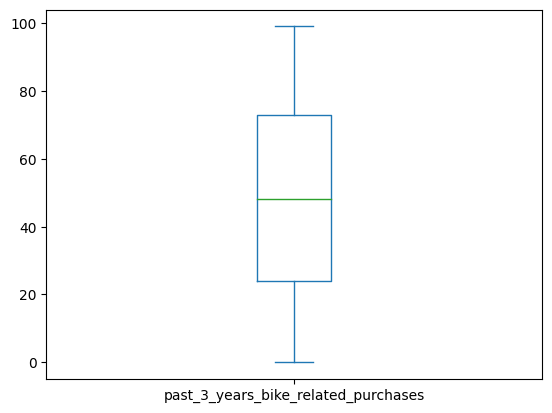

In [64]:
merged_final['past_3_years_bike_related_purchases'].plot(kind='box')

We can observe that the values ranges from [0-100] and by looking into it we can conclude that there are no outliers in the datasets and we are lack of specific units of the data in this column

In [61]:
merged_final.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'transaction_id',
       'product_id', 'transaction_date', 'online_order', 'order_status',
       'brand', 'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'address', 'postcode',
       'state', 'country', 'property_valuation'],
      dtype='object')

In [63]:
# Time to handel the Age

merged_final['DOB'].describe()

count    19773.000000
mean        45.914764
std         12.745760
min         21.000000
25%         37.000000
50%         46.000000
75%         55.000000
max        180.000000
Name: DOB, dtype: float64

we can see there are outliers in the data becasue avg human range is 0-100

<Axes: >

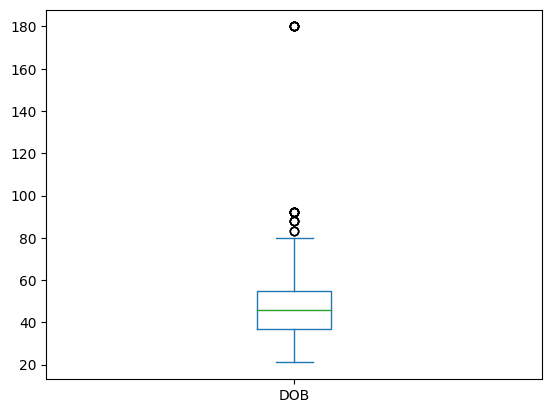

In [65]:
merged_final['DOB'].plot(kind='box')

<Axes: >

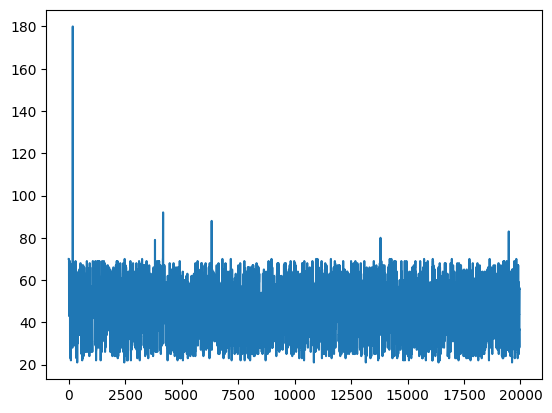

In [66]:
merged_final['DOB'].plot()

We can see that there only few outliers which are 180 remaining are resonable and explaine able age only

In [71]:
merged_final['DOB']=merged_final['DOB'].replace({180:merged_final['DOB'].mean()})

<Axes: >

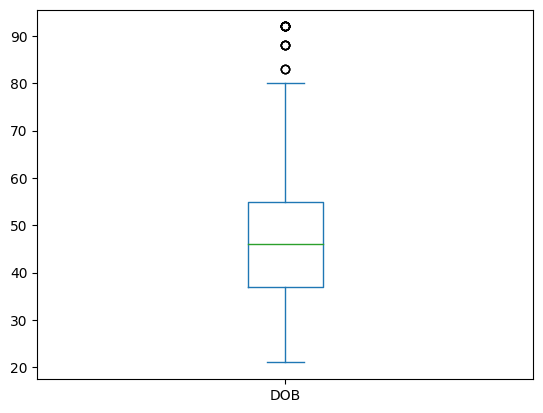

In [76]:
merged_final['DOB'].plot(kind='box')

Hence the outliers are handled hence there are no outliers

In [96]:
merged_final.groupby('gender')['job_title'].value_counts().to_frame()

count
gender job_title                        
F      Missing                      1257
       Social Worker                 157
       Assistant Professor           125
       Professor                     124
       Junior Executive              119
...                                  ...
U      Accounting Assistant III        3
       Computer Systems Analyst I      3
       Senior Editor                   2
       Software Test Engineer I        2
       VP Accounting                   2

[440 rows x 1 columns]

From the above observation we can see that most them are not  willing to expose their job tittle 

<Axes: xlabel='job_industry_category'>

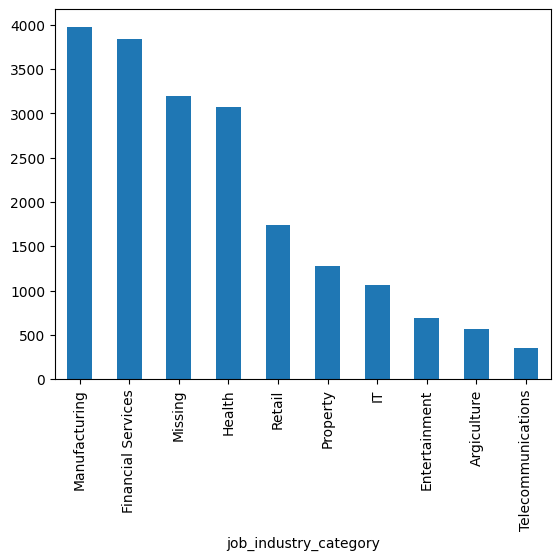

In [100]:
merged_final['job_industry_category'].value_counts().plot(kind='bar')

In [110]:
merged_final.groupby('job_industry_category')['gender'].value_counts()

job_industry_category  gender
Argiculture            F          314
                       M          252
Entertainment          M          367
                       F          327
Financial Services     F         1901
                       M         1897
                       U           38
Health                 F         1541
                       M         1507
                       U           25
IT                     U          369
                       F          357
                       M          334
Manufacturing          F         2077
                       M         1885
                       U           14
Missing                F         1695
                       M         1497
Property               F          653
                       M          625
Retail                 M          874
                       F          872
Telecommunications     M          181
                       F          171
Name: count, dtype: int64

We can see equal ratio among the job title 

In [111]:
merged_final.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'transaction_id',
       'product_id', 'transaction_date', 'online_order', 'order_status',
       'brand', 'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'address', 'postcode',
       'state', 'country', 'property_valuation'],
      dtype='object')

In [113]:
merged_final['wealth_segment'].value_counts()

wealth_segment
Mass Customer        9923
High Net Worth       5040
Affluent Customer    4810
Name: count, dtype: int64

Mass Customer are the high value generators to the company

In [134]:
NewCustomerList=NewCustomerList[['first_name', 'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode', 'state', 'country', 'property_valuation', 'Rank', 'Value']]

In [141]:
merged_final['state'].value_counts()

state
NSW                10083
VIC                 4509
QLD                 4222
New South Wales      480
Victoria             479
Name: count, dtype: int64

In [142]:
NewCustomerList['state'].value_counts()

state
NSW    506
VIC    266
QLD    228
Name: count, dtype: int64

We can see that most of the customers are from the NSW hence it is best market place

In [148]:
NewCustomerList['DOB']=pd.to_datetime(NewCustomerList['DOB'])

C:\Users\91845\AppData\Local\Temp\ipykernel_4988\1586523900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewCustomerList['DOB']=pd.to_datetime(NewCustomerList['DOB'])


In [149]:
NewCustomerList['DOB']=2023-NewCustomerList['DOB'].dt.year

C:\Users\91845\AppData\Local\Temp\ipykernel_4988\1733065628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewCustomerList['DOB']=2023-NewCustomerList['DOB'].dt.year


In [154]:
NewCustomerList['DOB'].describe()

count    983.000000
mean      52.206511
std       17.074268
min       21.000000
25%       40.000000
50%       51.000000
75%       66.000000
max       85.000000
Name: DOB, dtype: float64

# DATA EXPLORATION RESULTS

## Age Distribution 

In [189]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Create a histogram using Plotly Express
fig = px.histogram(x=NewCustomerList['DOB'], nbins=10, title="Age distribution ", color_discrete_sequence=['navy'])
fig2 = px.histogram(x=merged_final['DOB'], nbins=10, title="Age distribution ", color_discrete_sequence=['navy'])

fig.update_xaxes(title_text='Age')
fig.show()
fig2.update_xaxes(title_text='Age')
fig2.show()

# # Alternatively, create a histogram using Plotly Graph Objects
# histogram = go.Histogram(x=data, nbinsx=30)
# layout = go.Layout(title="Histogram using Plotly Graph Objects")
# fig = go.Figure(data=[histogram], layout=layout)
# fig.show()


# Bike purchase 


In [195]:
NewCustomerList['DOB'].value_counts()

DOB
49.0    29
47.0    27
45.0    27
50.0    27
62.0    26
        ..
77.0     7
34.0     6
39.0     5
74.0     4
21.0     3
Name: count, Length: 65, dtype: int64

In [201]:
NewCustomerList['past_3_years_bike_related_purchases']=NewCustomerList['past_3_years_bike_related_purchases'].astype('int')

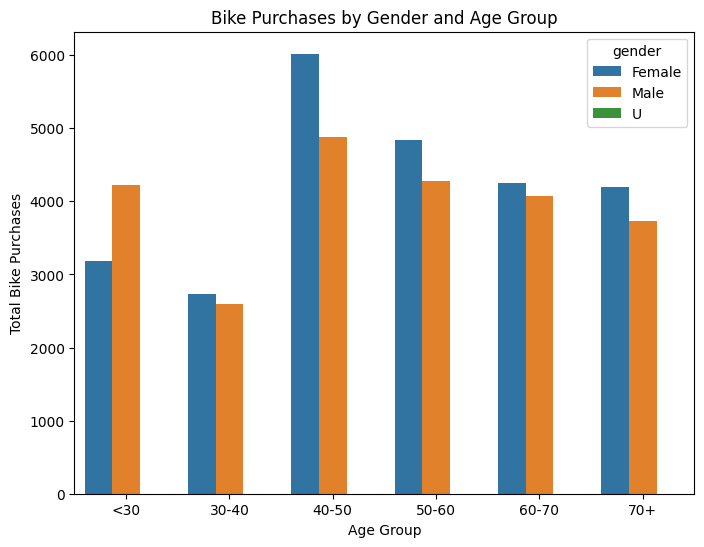

In [206]:

# Create age groups
NewCustomerList['Age_Group'] = pd.cut(NewCustomerList['DOB'], bins=[0, 30, 40, 50,60 ,70,np.inf], labels=['<30', '30-40', '40-50', '50-60','60-70','70+'])

# Calculate bike purchases for each gender and age group
result = NewCustomerList.groupby(['gender', 'Age_Group'])['past_3_years_bike_related_purchases'].sum().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=result, x='Age_Group', y='past_3_years_bike_related_purchases', hue='gender')
plt.title('Bike Purchases by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Bike Purchases')
plt.show()

# Data Exploration : Job Industry

In [210]:
job_industry=NewCustomerList['job_industry_category'].value_counts().to_dict()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


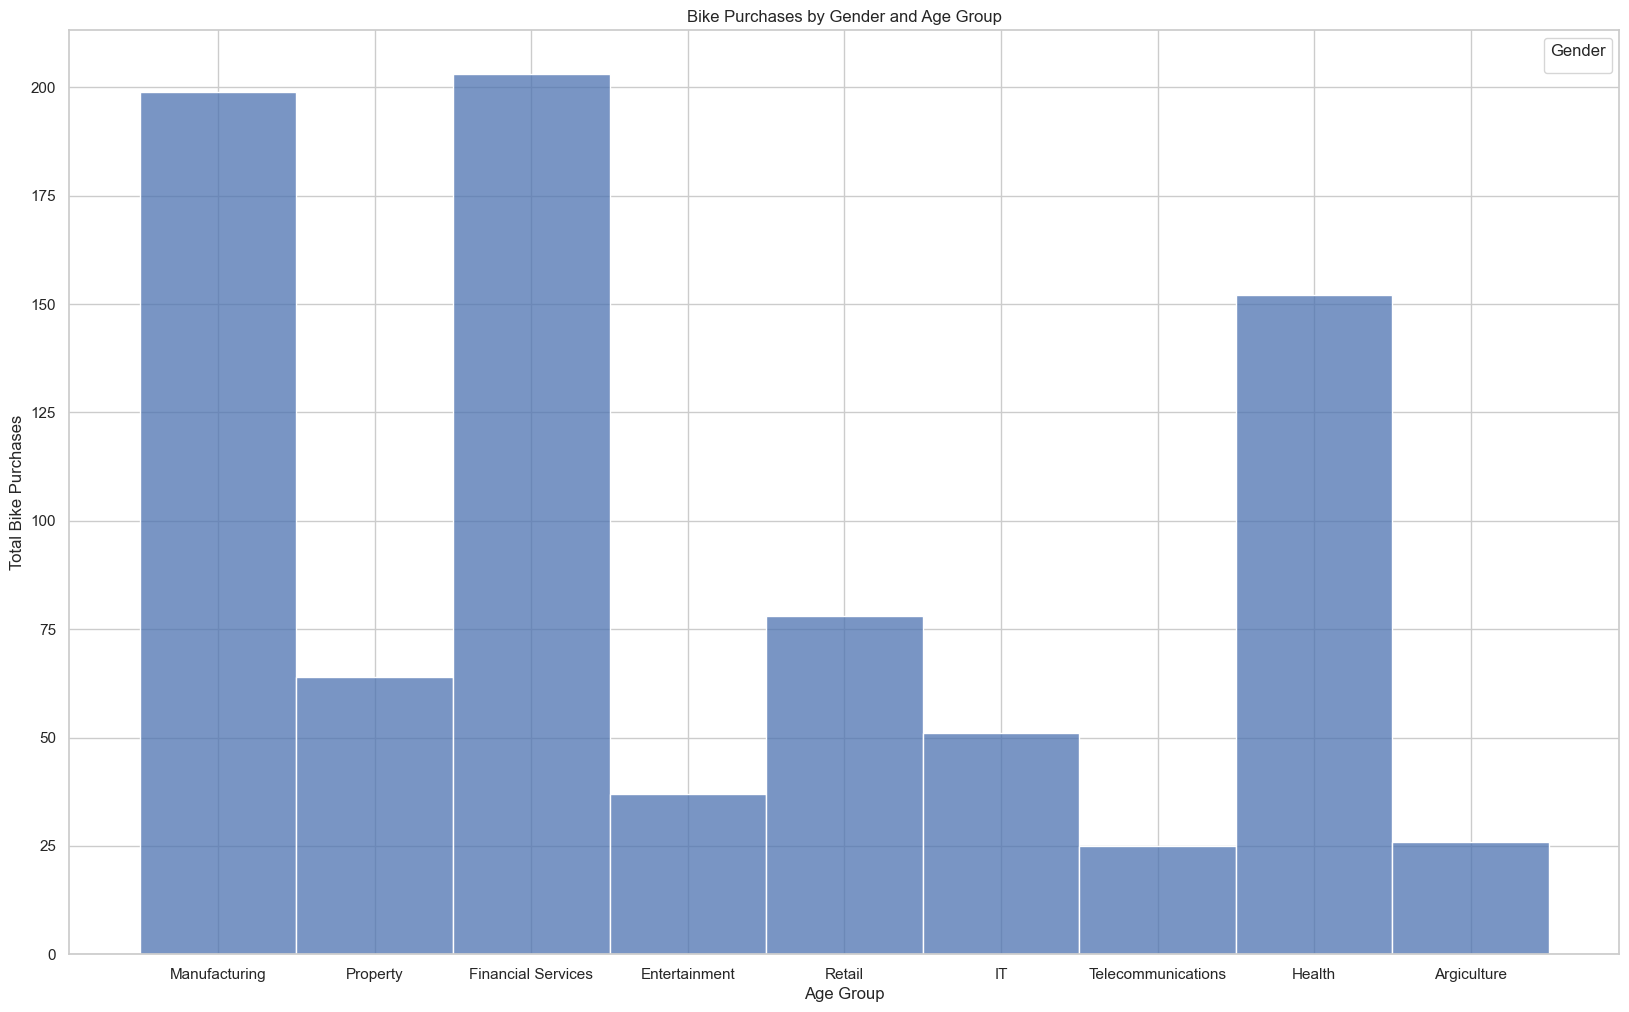

In [218]:
# Set Seaborn style and create a bar plot
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(20, 12))
sns.histplot(data=NewCustomerList, x='job_industry_category')
plt.title('Bike Purchases by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Bike Purchases')
plt.legend(title='Gender')
plt.show()

# Data Exploration : Number of cars owned


In [220]:
merged_final['owns_car'].value_counts()

owns_car
Yes    9950
No     9823
Name: count, dtype: int64

In [235]:
num_of_car=(NewCustomerList.groupby(NewCustomerList['state'])['owns_car'].value_counts())

<Axes: xlabel='state', ylabel='Count'>

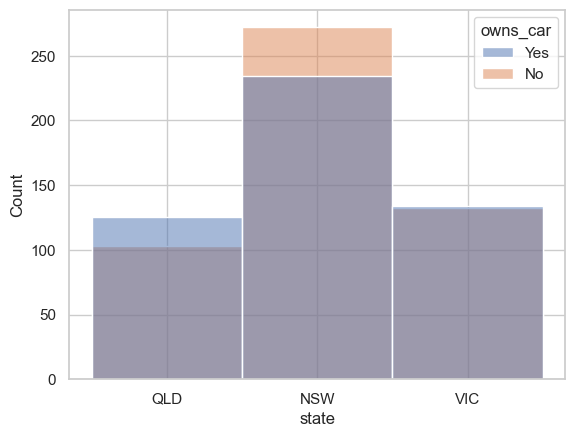

In [239]:
sns.histplot(x=NewCustomerList['state'],hue=NewCustomerList['owns_car'])

In [237]:
num_of_car

state  owns_car
NSW    No          272
       Yes         234
QLD    Yes         125
       No          103
VIC    Yes         134
       No          132
Name: count, dtype: int64

In [241]:
NewCustomerList.to_excel('powerbi.xlsx',index=False)